In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import transforms, utils, models
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import json

In [2]:
transform = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])])

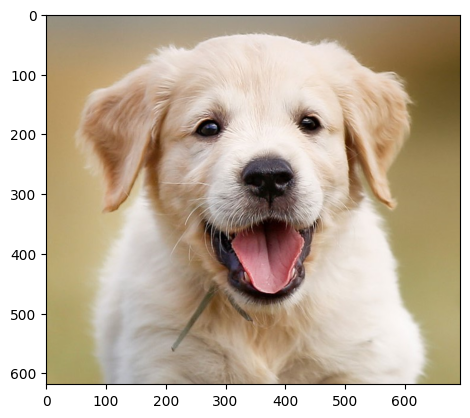

In [3]:
image = Image.open('data/dog.jpg')
plt.imshow(image)

In [4]:
vgg = models.vgg16(pretrained=True)

c:\Users\Raj\repos\nn-bc\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Raj\repos\nn-bc\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
vgg.classifier[-1]

Linear(in_features=4096, out_features=1000, bias=True)

In [6]:
CUDA = torch.cuda.is_available()
if CUDA:
    vgg = vgg.cuda()

In [7]:
# apply the transformations to the image
image = transform(image)

In [8]:
print(image.shape)

torch.Size([3, 224, 224])


In [9]:
# add the batch_size dimension
image = image.unsqueeze(0)

In [10]:
# wrap the tensor in a PyTorch Variable
image = Variable(image)

In [11]:
print(image.shape)

torch.Size([1, 3, 224, 224])


In [12]:
# transfer the tensor to the GPU if CUDA is available
if CUDA:
    image = image.cuda()

In [13]:
output = vgg(image)

In [14]:
print(output.shape)

torch.Size([1, 1000])


In [15]:
# transfer the 2d tensor to 1d
output = output.squeeze(0)

In [16]:
print(output.shape)

torch.Size([1000])


In [17]:
labels = json.load(open('data/imagenet_class_index.json'))

In [18]:
index = output.max(0)

In [19]:
print(index)

torch.return_types.max(
values=tensor(18.7308, device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor(207, device='cuda:0'))


In [20]:
index = str(index[1].item())
label = labels[index][1]

In [21]:
index
label

'golden_retriever'

In [22]:
module_list = list(vgg.features.modules())

In [23]:
module_list

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (1): ReLU(inplace=True)
   (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (3): ReLU(inplace=True)
   (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (6): ReLU(inplace=True)
   (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (8): ReLU(inplace=True)
   (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (11): ReLU(inplace=True)
   (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (13): ReLU(inplace=True)
   (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (15): ReLU(inplace=True)
   (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (17): Conv2d(

In [24]:
module_list[0]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [25]:
module_list[1]

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [26]:
module_list[2]

ReLU(inplace=True)

In [27]:
outputs = []
names = []
for layer in module_list[1:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
    print(image.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])


In [28]:
names

['Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)',
 'Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)',
 'Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)',
 'Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))',
 'ReLU(inplace=True)',
 'Conv2d(

In [29]:
for feature_map in outputs:
    print(feature_map.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])


In [30]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    # convert the 3d tensor to 2d by summing the channels
    gray_scale = torch.sum(feature_map, 0)
    # normalize the values of the gray_scale image between 0 and 1
    gray_scale = gray_scale/feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())

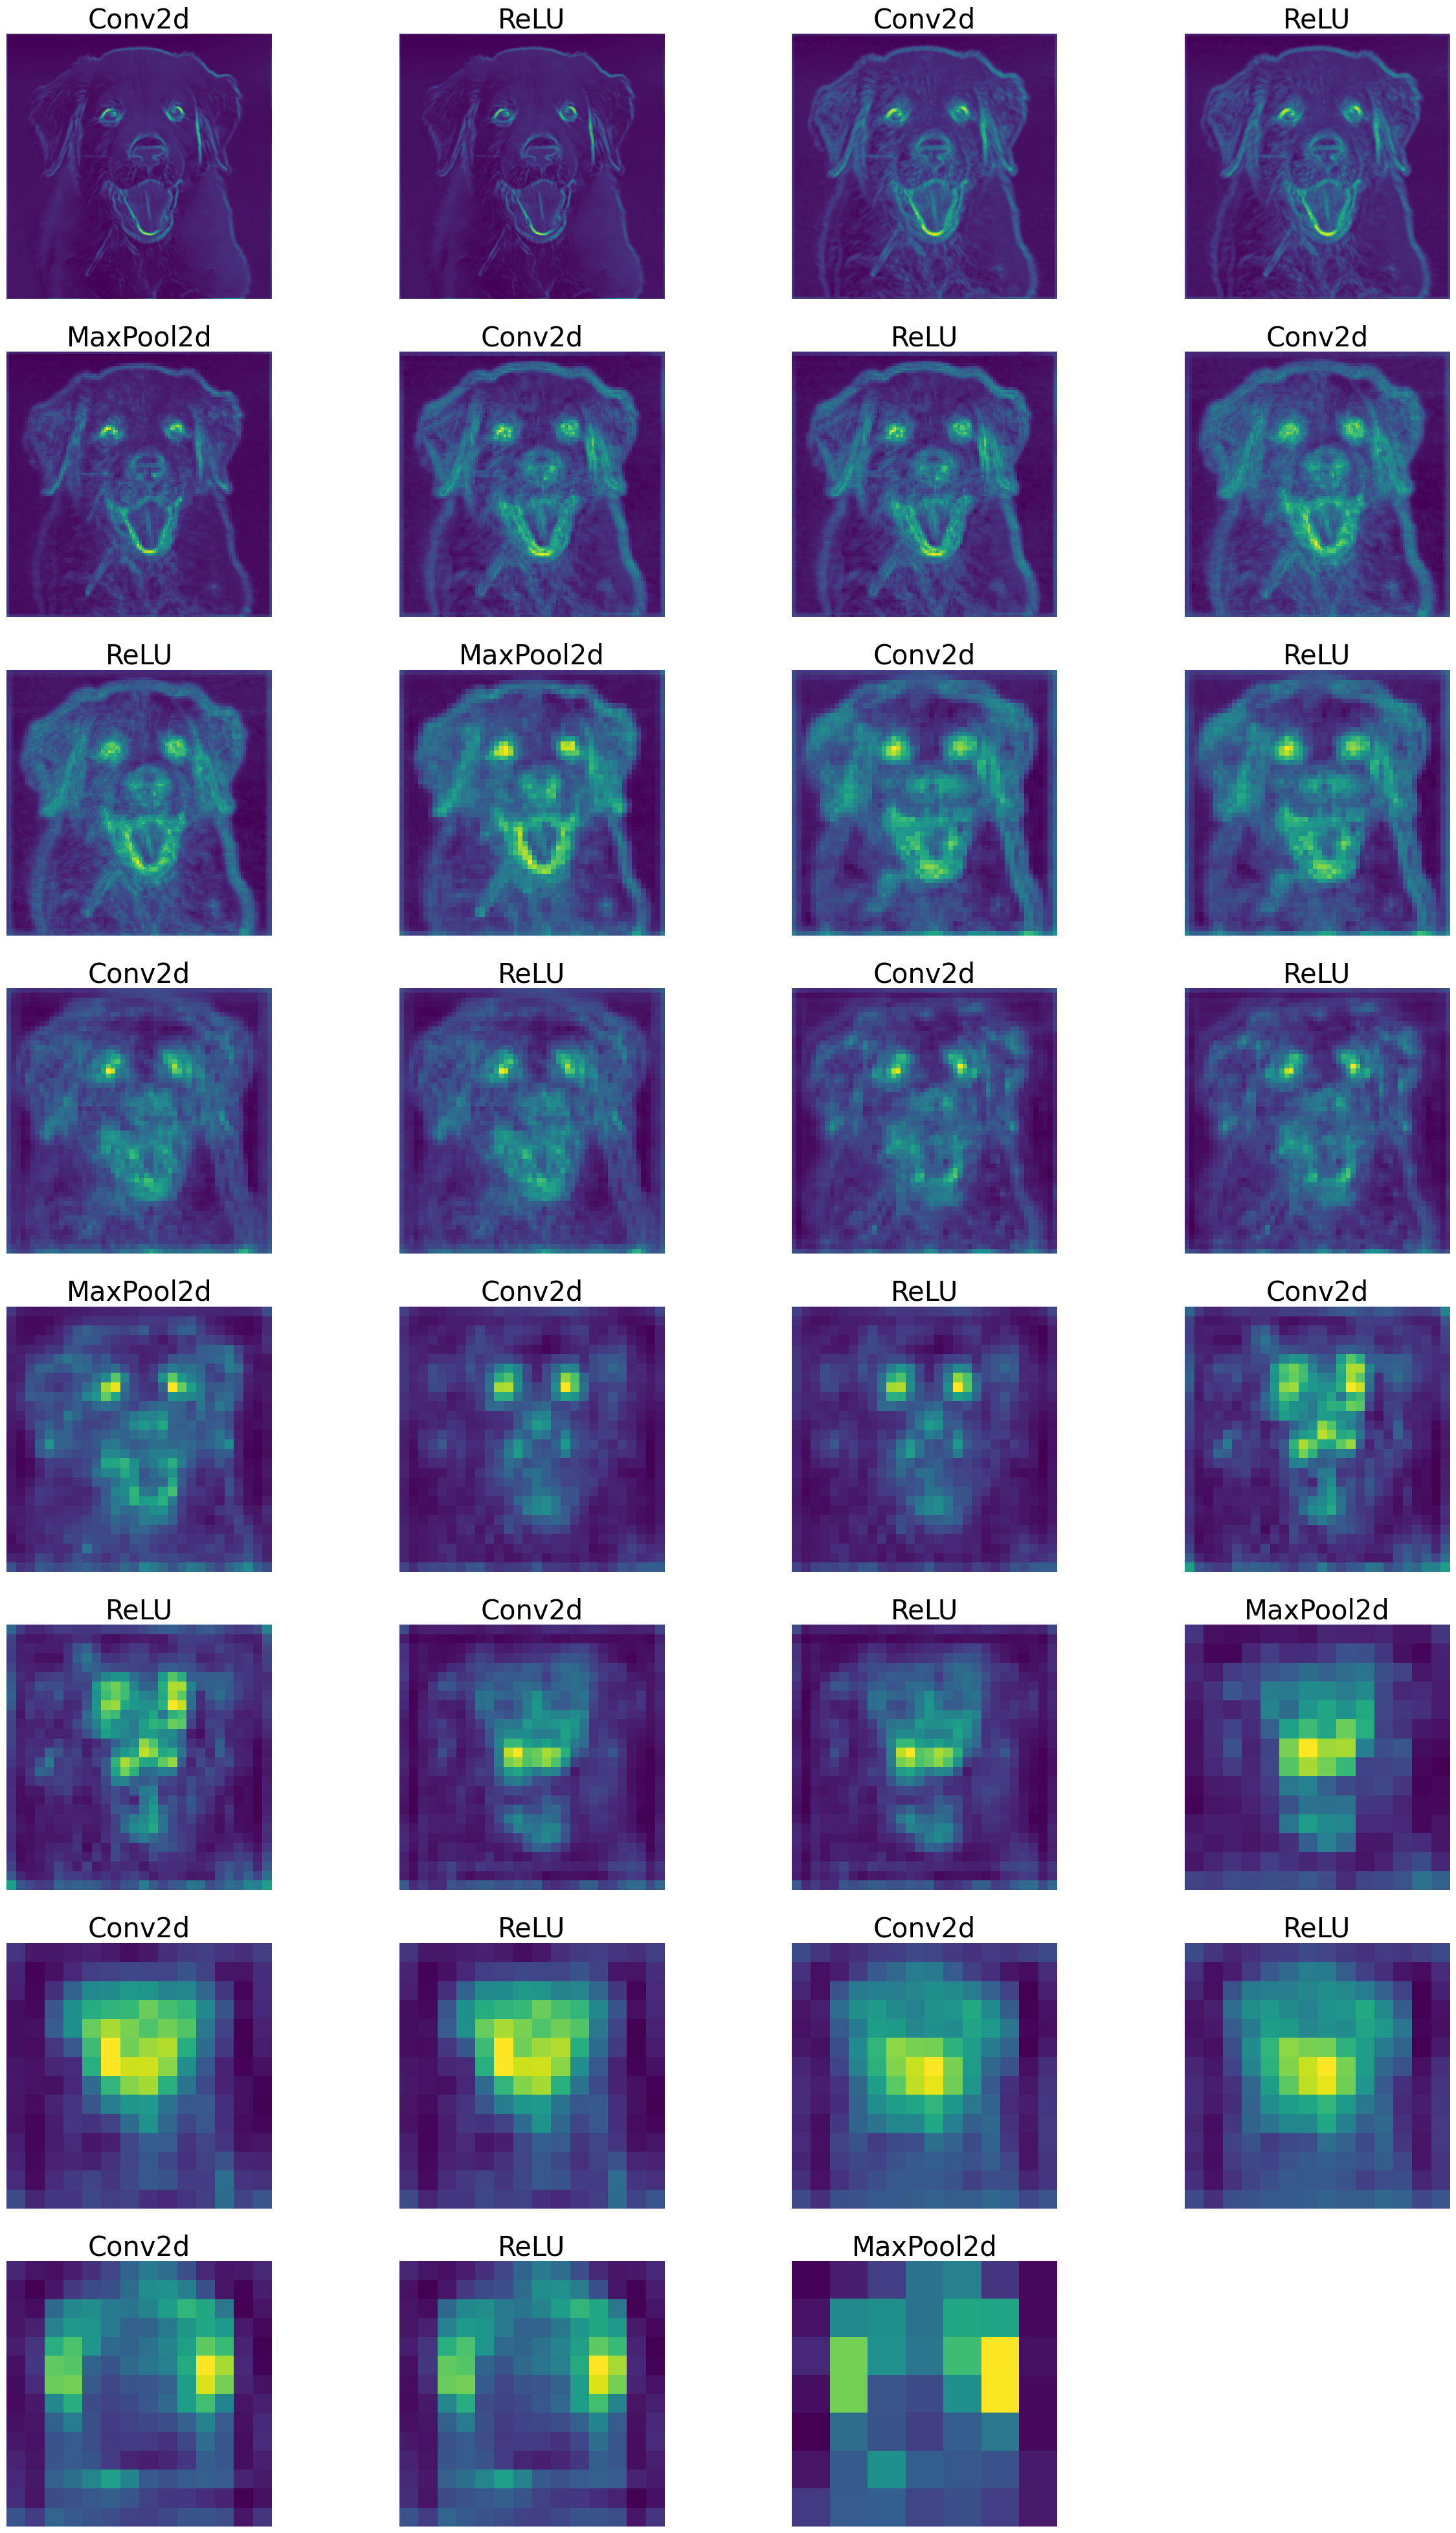

In [31]:
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
    a = fig.add_subplot(8, 4, i+1)
    imgplot = plt.imshow(processed[i])
    plt.axis('off')
    a.set_title(names[i].split('(')[0], fontsize=30)

plt.savefig('feature_maps.png', bbox_inches='tight')